In [30]:
import pandas as pd
import numpy as np
import urllib
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import reduce

In [31]:
data = pd.read_json('data.json', orient = 'index')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,554,555,556,557,558,559,560,561,562,563
states_daily,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...","{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '...",...,"{'an': '1', 'ap': '60', 'ar': '1', 'as': '13',...","{'an': '17', 'ap': '8846', 'ar': '169', 'as': ...","{'an': '40', 'ap': '9628', 'ar': '127', 'as': ...","{'an': '0', 'ap': '69', 'ar': '2', 'as': '10',...","{'an': '19', 'ap': '8835', 'ar': '226', 'as': ...","{'an': '27', 'ap': '10845', 'ar': '129', 'as':...","{'an': '0', 'ap': '64', 'ar': '0', 'as': '19',...","{'an': '11', 'ap': '8702', 'ar': '159', 'as': ...","{'an': '33', 'ap': '10712', 'ar': '180', 'as':...","{'an': '0', 'ap': '72', 'ar': '0', 'as': '17',..."


In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
months = {
    'Jan' : '01', 'Feb' : '02',
    'Mar' : '03', 'Apr' : '04',
    'May' : '05', 'Jun' : '06', 
    'Jul' : '07', 'Aug' : '08', 
    'Sep' : '09', 'Oct' : '10', 
    'Nov' : '11', 'Dec' : '12'
}
# Considering Delhi as a state
states = {
    'ap' : 'Andhra Pradesh',
    'ar' : 'Arunachal Pradesh',
    'as' : 'Assam',
    'br' : 'Bihar',
    'nl' : 'Nagaland',
    'mz' : 'Mizoram',
    'sk' : 'Sikkim',
    'rj' : 'Rajasthan',
    'or' : 'Odisha',
    'hp' : 'Himachal Pradesh',
    'up' : 'Uttar Pradesh',
    'jh' : 'Jharkhand',
    'ct' : 'Chhattisgarh',
    'pb' : 'Punjab',
    'kl' : 'Kerala',
    'tn' : 'Tamil Nadu',
    'ut' : 'Uttarakhand',
    'hr' : 'Haryana',
    'jk' : 'Jammu And Kashmir',
    'mh' : 'Maharashtra',
    'ka' : 'Karnataka',
    'gj' : 'Gujarat',
    'dl' : 'Delhi',
    'tg' : 'Telangana',
    'tr' : 'Tripura',
    'mp' : 'Madhya Pradesh',
    'wb' : 'West Bengal',
    'mn' : 'Manipur',
    'ga' : 'Goa'
}
union_territories = {
    'an' : 'Andaman and Nicobar Islands',
    'py' : 'Puducherry',
    'ch' : 'Chandigarh',
    'py' : 'Puducherry',
    'dn' : 'Dadara & Nagar Haveli & Daman & Diu',
    'la' : 'Ladakh',
    'ld' : 'Lakshadweep'   
}
# The start date and end date will be represented in the form of YYYY-MM-DD
start_date = "2020-03-14"
end_date = "2020-09-05"

In [34]:
def generate_date(record):
    day = record['date'][:2]
    month = months[record['date'][3:6]]
    year = record['date'][7:]
#     Assuming that dates before 1920 wouldn't be present in the data
    if year <= '20':
        year = '20' + year
    else:
        year = '19' + year
    date_of_record = year + '-' + month + '-' + day
    return date_of_record

In [35]:
# Question 1.1
confirmed_count = 0
recovered_count = 0
deceased_count = 0

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states or param in union_territories:
                        confirmed_count += int(record[str(param)])
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states or param in union_territories:
                        recovered_count += int(record[str(param)])
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states or param in union_territories:
                        deceased_count += int(record[str(param)])

print('confirmed_count:',confirmed_count, 'recovered_count:',recovered_count, 'deceased_count:',deceased_count)

confirmed_count: 4107298 recovered_count: 3176139 deceased_count: 70080


In [36]:
# Question 1.2
confirmed_count = 0
recovered_count = 0
deceased_count = 0

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                confirmed_count += int(record['dl'])
            elif record['status'] == 'Recovered':
                recovered_count += int(record['dl'])
            elif record['status'] == 'Deceased':
                deceased_count += int(record['dl'])
                    
print('confirmed_count:',confirmed_count, 'recovered_count:',recovered_count, 'deceased_count:',deceased_count)

confirmed_count: 188193 recovered_count: 163785 deceased_count: 4538


In [37]:
# Question 1.3
confirmed_count = 0
recovered_count = 0
deceased_count = 0

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                confirmed_count += int(record['dl']) + int(record['mh'])
            elif record['status'] == 'Recovered':
                recovered_count += int(record['dl']) + int(record['mh'])
            elif record['status'] == 'Deceased':
                deceased_count += int(record['dl']) + int(record['mh'])
                    
print('confirmed_count:',confirmed_count, 'recovered_count:',recovered_count, 'deceased_count:',deceased_count)

confirmed_count: 1072055 recovered_count: 800359 deceased_count: 30813


In [38]:
# Question 1.4
states_count = {state : [0,0,0] for state in states}

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states:
                        states_count[str(param)][0] += int(record[str(param)])
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states:
                        states_count[str(param)][1] += int(record[str(param)])
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states:
                        states_count[str(param)][2] += int(record[str(param)])

confirmed_state = []
confirmed_state_val = -1
recovered_state = []
recovered_state_val = -1
deceased_state = []
deceased_state_val = -1

for state in states_count:
    if states_count[state][0] > confirmed_state_val:
        confirmed_state_val = states_count[state][0]
        confirmed_state = [states[str(state)]]
    if states_count[state][1] > recovered_state_val:
        recovered_state_val = states_count[state][1]
        recovered_state = [states[str(state)]]
    if states_count[state][2] > deceased_state_val:
        deceased_state_val = states_count[state][2]
        deceased_state = [states[str(state)]]
#     If multiple states have the same value
    if states_count[state][0] == confirmed_state_val:
        confirmed_state.append(states[str(state)])
    if states_count[state][1] == recovered_state_val:
        recovered_state.append(states[str(state)])
    if states_count[state][2] == deceased_state_val:
        deceased_state.append(states[str(state)])
        
# Remove duplicates
confirmed_state = list(set(confirmed_state))
recovered_state = list(set(recovered_state))
deceased_state = list(set(deceased_state))

print('Confirmed \n')
print('Highest affected State(s) is:', ' '.join(confirmed_state))
print('Highest affected State count is: ', confirmed_state_val)
print()
print('Recovered \n')
print('Highest affected State(s) is:', ' '.join(recovered_state))
print('Highest affected State count is:', recovered_state_val)
print()
print('Deceased \n')
print('Highest affected State(s) is:', ' '.join(deceased_state))
print('Highest affected State count is:', deceased_state_val)

Confirmed 

Highest affected State(s) is: Maharashtra
Highest affected State count is:  883862

Recovered 

Highest affected State(s) is: Maharashtra
Highest affected State count is: 636574

Deceased 

Highest affected State(s) is: Maharashtra
Highest affected State count is: 26275


In [39]:
# Question 1.5
states_count = {state : [0,0,0] for state in states}

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states:
                        states_count[str(param)][0] += int(record[str(param)])
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states:
                        states_count[str(param)][1] += int(record[str(param)])
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states:
                        states_count[str(param)][2] += int(record[str(param)])

# Assuming no state has 10 Cr cases in any field
upper_cap = 100000000
confirmed_state = []
confirmed_state_val = upper_cap
recovered_state = []
recovered_state_val = upper_cap
deceased_state = []
deceased_state_val = upper_cap

for state in states_count:
    if states_count[state][0] < confirmed_state_val:
        confirmed_state_val = states_count[state][0]
        confirmed_state = [states[str(state)]]
    if states_count[state][1] < recovered_state_val:
        recovered_state_val = states_count[state][1]
        recovered_state = [states[str(state)]]
    if states_count[state][2] < deceased_state_val:
        deceased_state_val = states_count[state][2]
        deceased_state = [states[str(state)]]
#     If multiple states have the same value
    if states_count[state][0] == confirmed_state_val:
        confirmed_state.append(states[str(state)])
    if states_count[state][1] == recovered_state_val:
        recovered_state.append(states[str(state)])
    if states_count[state][2] == deceased_state_val:
        deceased_state.append(states[str(state)])
        
# Remove duplicates
confirmed_state = list(set(confirmed_state))
recovered_state = list(set(recovered_state))
deceased_state = list(set(deceased_state))

print('Confirmed \n')
print('Lowest affected State(s) is:', ' '.join(confirmed_state))
print('Lowest affected State count is: ', confirmed_state_val)
print()
print('Recovered \n')
print('Lowest affected State(s) is:', ' '.join(recovered_state))
print('Lowest affected State count is:', recovered_state_val)
print()
print('Deceased \n')
print('Lowest affected State(s) is:', ' '.join(deceased_state))
print('Lowest affected State count is:', deceased_state_val)

Confirmed 

Lowest affected State(s) is: Mizoram
Lowest affected State count is:  1062

Recovered 

Lowest affected State(s) is: Mizoram
Lowest affected State count is: 713

Deceased 

Lowest affected State(s) is: Mizoram
Lowest affected State count is: 0


In [40]:
# Question 1.6
confirmed_date = []
confirmed_date_val = -1
recovered_date = []
recovered_date_val = -1
deceased_date = []
deceased_date_val = -1

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                if confirmed_date_val < int(record['dl']):
                    confirmed_date = [date_of_record]
                    confirmed_date_val = int(record['dl'])
                elif confirmed_date_val == int(record['dl']):
                    confirmed_date.append(date_of_record)
            elif record['status'] == 'Recovered':
                if recovered_date_val < int(record['dl']):
                    recovered_date = [date_of_record]
                    recovered_date_val = int(record['dl'])
                elif recovered_date_val == int(record['dl']):
                    recovered_date.append(date_of_record)
            elif record['status'] == 'Deceased':
                if deceased_date_val < int(record['dl']):
                    deceased_date = [date_of_record]
                    deceased_date_val = int(record['dl'])
                elif deceased_date_val == int(record['dl']):
                    deceased_date.append(date_of_record)

# Remove duplicates
confirmed_date = list(set(confirmed_date))
recovered_date = list(set(recovered_date))
deceased_date = list(set(deceased_date))

print('Confirmed \n')
print('Day(s): ', ' '.join(confirmed_date))
print('Count: ', confirmed_date_val)
print()
print('Recovered \n')
print('Day(s): ', ' '.join(recovered_date))
print('Count: ', recovered_date_val)
print()
print('Deceased \n')
print('Day(s): ',' '.join(deceased_date))
print('Count: ', deceased_date_val)

Confirmed 

Day(s):  2020-06-23
Count:  3947

Recovered 

Day(s):  2020-06-20
Count:  7725

Deceased 

Day(s):  2020-06-16
Count:  437


In [41]:
# Question 1.7
states_count = {state : 0 for state in states}
union_ = {val : 0 for val in union_territories}
for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states:
                        states_count[str(param)] += int(record[str(param)])
                    if param in union_territories:
                        union_[str(param)] += int(record[str(param)])
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states:
                        states_count[str(param)] -= int(record[str(param)])
                    if param in union_territories:
                        union_[str(param)] -= int(record[str(param)])
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states:
                        states_count[str(param)] -= int(record[str(param)])
                    if param in union_territories:
                        union_[str(param)] -= int(record[str(param)])
                        
print("Active cases in each state")
result = {states[key] : states_count[key] for key in states_count}
result2 = {union_territories[key] : union_[key] for key in union_}
print('\n'.join(f'{k}: {v}' for k,v in result.items()))
print()
print("Active cases in each union territory")
print('\n'.join(f'{k}: {v}' for k,v in result2.items()))

Active cases in each state
Andhra Pradesh: 100880
Arunachal Pradesh: 1525
Assam: 28404
Bihar: 16735
Nagaland: 701
Mizoram: 349
Sikkim: 561
Rajasthan: 14996
Odisha: 25856
Himachal Pradesh: 2023
Uttar Pradesh: 59963
Jharkhand: 14980
Chhattisgarh: 22320
Punjab: 15870
Kerala: 21867
Tamil Nadu: 51580
Uttarakhand: 7649
Haryana: 14912
Jammu And Kashmir: 9547
Maharashtra: 221013
Karnataka: 100224
Gujarat: 16266
Delhi: 19870
Telangana: 32405
Tripura: 5905
Madhya Pradesh: 15687
West Bengal: 23390
Manipur: 1872
Goa: 4945

Active cases in each union territory
Andaman and Nicobar Islands: 343
Puducherry: 5163
Chandigarh: 2143
Dadara & Nagar Haveli & Daman & Diu: 301
Ladakh: 834
Lakshadweep: 0


In [42]:
# Question 2.1
data = pd.read_json('data.json', orient = 'index')

df_confirmed = pd.DataFrame()
df_recovered = pd.DataFrame()
df_deceased = pd.DataFrame()

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        confirmed_count = 0
        recovered_count = 0
        deceased_count = 0
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states or param in union_territories:
                        confirmed_count += int(record[str(param)])
                df_confirmed[date_of_record] = [confirmed_count]
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states or param in union_territories:
                        recovered_count += int(record[str(param)])
                df_recovered[date_of_record] = [recovered_count]
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states or param in union_territories:
                        deceased_count += int(record[str(param)])
                df_deceased[date_of_record] = [deceased_count]

frames = [df_confirmed, df_recovered, df_deceased]
df = reduce(lambda  left,right: pd.merge(left,right,how='outer'), frames)
df.to_excel('Daywise_Cases.xlsx', index = False)
df = pd.read_excel('Daywise_Cases.xlsx')

In [43]:
df.head()

,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05
0,81,27,15,11,37,27,58,78,67,102,...,76747,76547,78436,79401,68741,78096,82783,84047,87007,90418
1,9,4,1,1,0,5,3,0,0,12,...,59595,64416,64905,60408,64322,62072,67791,67416,69550,73102
2,2,0,0,1,0,1,0,0,3,2,...,1065,1018,943,960,816,890,912,979,949,915


In [44]:
type(df)
df.index = ['Confirmed Cases', 'Recovered Cases', 'Deceased Cases']

In [45]:
df.columns = list(map(str, df.columns))
df.columns

Index(['2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
       '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
       ...
       '2020-08-27', '2020-08-28', '2020-08-29', '2020-08-30', '2020-08-31',
       '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05'],
      dtype='object', length=176)

In [46]:
df.head()

,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05
Confirmed Cases,81,27,15,11,37,27,58,78,67,102,...,76747,76547,78436,79401,68741,78096,82783,84047,87007,90418
Recovered Cases,9,4,1,1,0,5,3,0,0,12,...,59595,64416,64905,60408,64322,62072,67791,67416,69550,73102
Deceased Cases,2,0,0,1,0,1,0,0,3,2,...,1065,1018,943,960,816,890,912,979,949,915


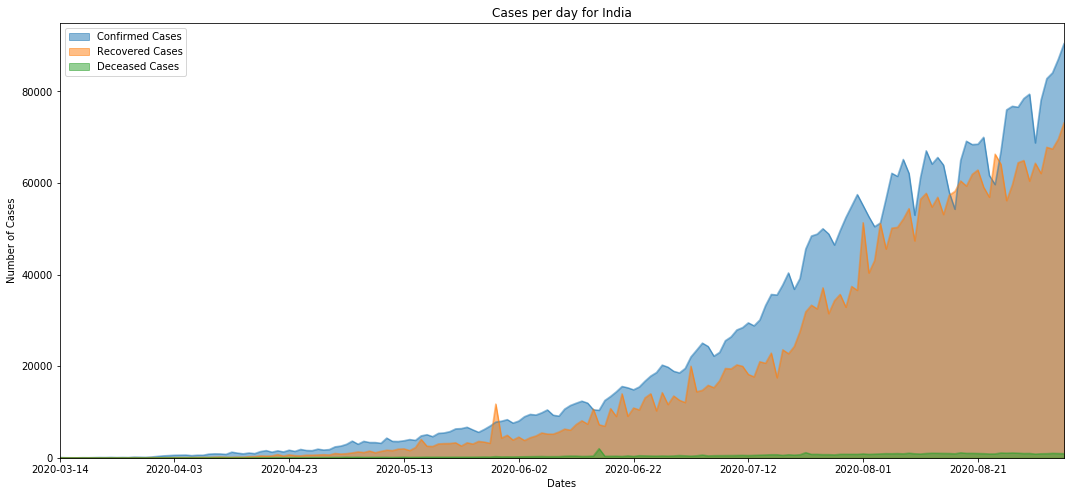

In [47]:
df = df.transpose()
df.plot(kind = 'area', stacked = False, figsize = (18, 8))
plt.title('Cases per day for India')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')
plt.show()

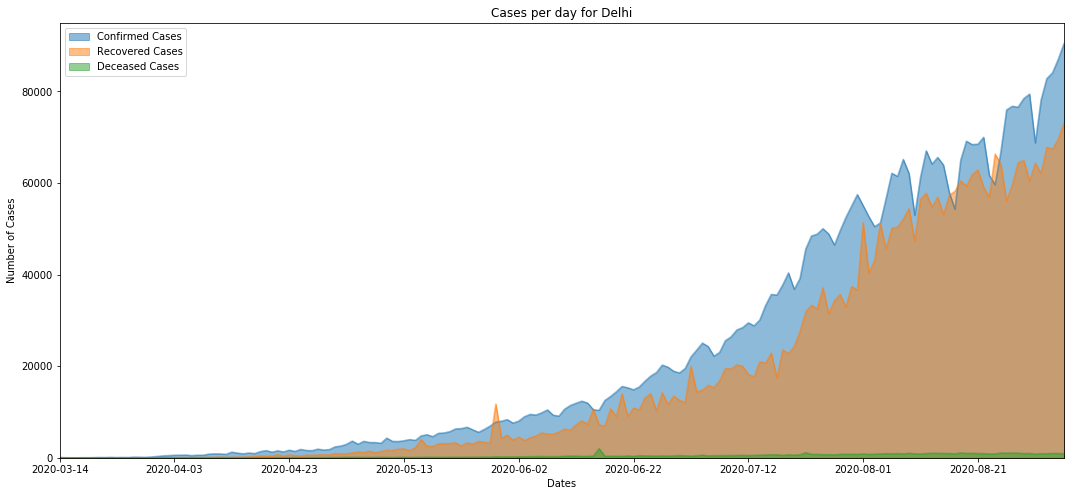

In [48]:
# Question 2.2
data = pd.read_json('data.json', orient = 'index')

df_confirmed = pd.DataFrame()
df_recovered = pd.DataFrame()
df_deceased = pd.DataFrame()

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        confirmed_count = 0
        recovered_count = 0
        deceased_count = 0
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
#                 for param in record:
#                     if param in states or param in union_territories:
                confirmed_count += int(record['dl'])
                df_confirmed[date_of_record] = [confirmed_count]
            elif record['status'] == 'Recovered':
#                 for param in record:
#                     if param in states or param in union_territories:
                recovered_count += int(record['dl'])
                df_recovered[date_of_record] = [recovered_count]
            elif record['status'] == 'Deceased':
#                 for param in record:
#                     if param in states or param in union_territories:
                deceased_count += int(record['dl'])
                df_deceased[date_of_record] = [deceased_count]

frames = [df_confirmed, df_recovered, df_deceased]
df = reduce(lambda  left,right: pd.merge(left,right,how='outer'), frames)
df.to_excel('Daywise_Cases_Delhi.xlsx', index = False)
df = pd.read_excel('Daywise_Cases.xlsx')
df.index = ['Confirmed Cases', 'Recovered Cases', 'Deceased Cases']
df.columns = list(map(str, df.columns))

df = df.transpose()
df.plot(kind = 'area', stacked = False, figsize = (18, 8))
plt.title('Cases per day for Delhi')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')
plt.show()

In [49]:
# Question 2.3
data = pd.read_json('data.json', orient = 'index')

df_active = pd.DataFrame()

count = 0
for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                for param in record:
                    if param in states or param in union_territories:
                        count += int(record[str(param)])
            elif record['status'] == 'Recovered':
                for param in record:
                    if param in states or param in union_territories:
                        count -= int(record[str(param)])
            elif record['status'] == 'Deceased':
                for param in record:
                    if param in states or param in union_territories:
                        count -= int(record[str(param)])
                df_active[date_of_record] = [count]

df_active.to_excel('Daywise_Active_Cases.xlsx', index = False)
df = pd.read_excel('Daywise_Active_Cases.xlsx')

In [50]:
df.head()

,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05
0,70,93,107,116,153,174,229,307,371,459,...,737967,749080,761668,779701,783304,798438,812518,828170,844678,861079


In [51]:
df.index = ['Active Cases']

In [52]:
df.head()

,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,...,2020-08-27,2020-08-28,2020-08-29,2020-08-30,2020-08-31,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05
Active Cases,70,93,107,116,153,174,229,307,371,459,...,737967,749080,761668,779701,783304,798438,812518,828170,844678,861079


In [53]:
df.columns = list(map(str, df.columns))

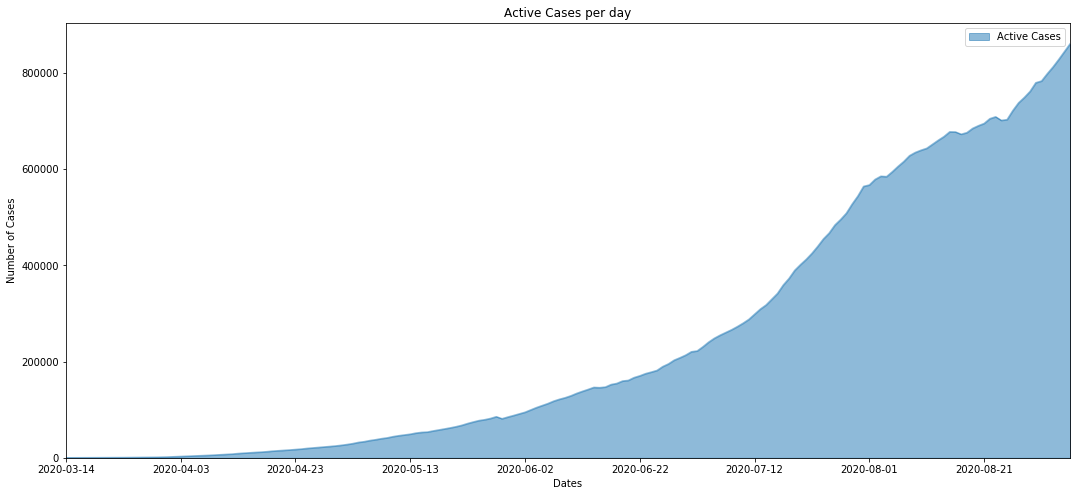

In [54]:
df = df.transpose()
df.plot(kind = 'area', stacked = False, figsize = (18, 8))
plt.title('Active Cases per day')
plt.ylabel('Number of Cases')
plt.xlabel('Dates')
plt.show()

In [55]:
# Question 3
# Line is y = mx + c
data = pd.read_json('data.json', orient = 'index')

days = 1
confirmed = []
recovered = []
deceased = []

for i in data:
    for record in data[i]:
        date_of_record = generate_date(record)
        if date_of_record <= end_date and date_of_record >= start_date:
            if record['status'] == 'Confirmed':
                confirmed.append(int(record['dl']))
            elif record['status'] == 'Recovered':
                recovered.append(int(record['dl']))
            elif record['status'] == 'Deceased':
                deceased.append(int(record['dl']))
                days += 1

# X co-ordinates 
dates = [i for i in range(1, days)]

m = np.mean(dates)
v = np.var(dates)

# Calculation of Slope and intercept of Confirmed cases
confirmed_slope = np.cov(dates, confirmed)[0][1] / v
confirmed_intercept = np.mean(confirmed) - (m * confirmed_slope)

# Calculation of Slope and intercept of Recovered cases
recovered_slope = np.cov(dates, recovered)[0][1] / v
recovered_intercept = np.mean(recovered) - (m * recovered_slope)

# Calculation of Slope and intercept of Deceased cases
deceased_slope = np.cov(dates, deceased)[0][1] / v
deceased_intercept = np.mean(deceased) - (m * deceased_slope)

print('Confirmed Slope:', confirmed_slope, 'Confirmed Intercept:', confirmed_intercept)
print('Recovered Slope:', recovered_slope, 'Recovered Intercept:', recovered_intercept)
print('Deceased Slope:', deceased_slope, 'Deceased Intercept:', deceased_intercept)

Confirmed Slope: 12.28406502940159 Confirmed Intercept: -17.861346011131673
Recovered Slope: 12.375845589761328 Recovered Intercept: -164.66574378478674
Deceased Slope: 0.19132037357315806 Deceased Intercept: 8.852237847866423


In [56]:
confirmed_intercept + confirmed_slope*132

1603.6352378698782

In [57]:
confirmed[132]

1025

In [58]:
np.mean(confirmed)

1069.278409090909